<a href="https://colab.research.google.com/github/dibend/Colab/blob/main/AMZN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


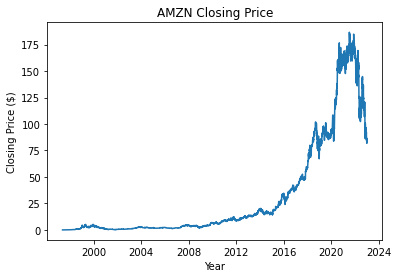

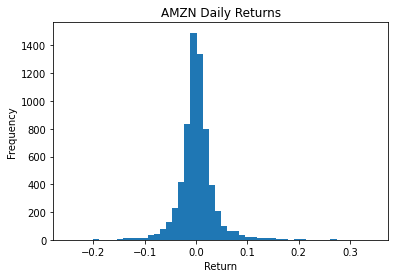

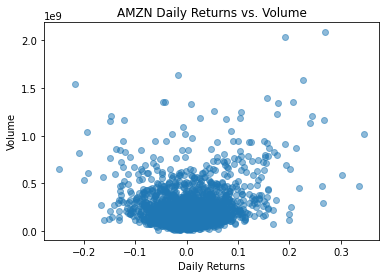

<ipython-input-4-7d2e5891e1cf>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_ohlc['Date'] = stock_data_ohlc['Date'].map(mdates.date2num)


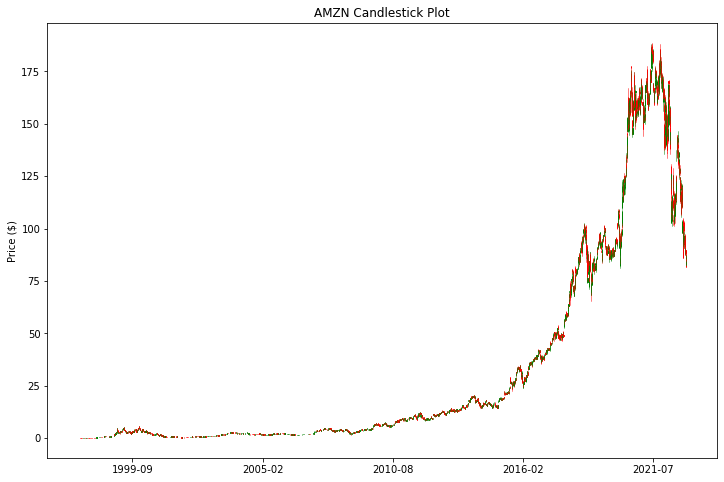

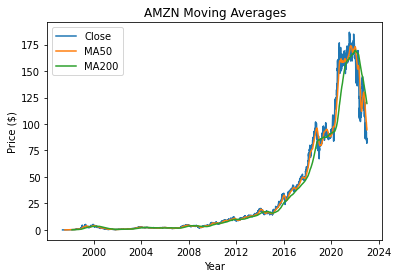

In [4]:
# First, install yfinance if it is not already installed
!pip install yfinance
!pip install mplfinance

# Now, let's import the necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

# Next, we'll retrieve the stock data for AMZN
stock_data = yf.Ticker("AMZN").history(period="max")

# Now, let's plot the closing price over time
plt.plot(stock_data['Close'])
plt.title('AMZN Closing Price')
plt.xlabel('Year')
plt.ylabel('Closing Price ($)')
plt.show()

# We can also plot the daily return distribution using a histogram
plt.hist(stock_data['Close'].pct_change(), bins=50)
plt.title('AMZN Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

# Finally, let's create a scatterplot of the daily returns
plt.scatter(stock_data['Close'].pct_change(), stock_data['Volume'], alpha=0.5)
plt.title('AMZN Daily Returns vs. Volume')
plt.xlabel('Daily Returns')
plt.ylabel('Volume')
plt.show()

# Select the data for the candlestick plot
stock_data_ohlc = stock_data[['Open', 'High', 'Low', 'Close']]
stock_data_ohlc.reset_index(inplace=True)
stock_data_ohlc['Date'] = stock_data_ohlc['Date'].map(mdates.date2num)

# Create the candlestick plot
fig, ax = plt.subplots(figsize=(12,8))
candlestick_ohlc(ax, stock_data_ohlc.values, width=0.6, colorup='g', colordown='r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('AMZN Candlestick Plot')
plt.ylabel('Price ($)')
plt.show()

# Calculate the 50-day and 200-day moving averages
stock_data['MA50'] = stock_data['Close'].rolling(50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(200).mean()

# Plot the closing price and moving averages
plt.plot(stock_data['Close'], label='Close')
plt.plot(stock_data['MA50'], label='MA50')
plt.plot(stock_data['MA200'], label='MA200')
plt.legend()
plt.title('AMZN Moving Averages')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.show()
